In [ ]:
import numpy as np 
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [ ]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance == 0:
            pathway = 0
            for i in range(0, len(self.route)):
                startPoint = self.route[i]
                finishPoint = None
                if i + 1 < len(self.route):
                    finishPoint = self.route[i + 1]
                else:
                    finishPoint = self.route[0]
                pathway += startPoint.distance(finishPoint)
            self.distance = pathway
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [ ]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

createRoute(cityList)

[(152,115),
 (64,0),
 (157,148),
 (189,27),
 (84,178),
 (76,62),
 (125,78),
 (131,137),
 (25,139),
 (135,152)]

In [ ]:
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [ ]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
        sortedFitRes = sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
        # print(sortedFitRes)
    return sortedFitRes

In [ ]:
def selection(popRanked, eliteSize):
    selectionResults = []
    # Будем использовать метод рулетки…
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum() # Метод проводит последовательное суммирование пред. эл к посл. с сохранением
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]: # Method: Access a single value for a row/column pair by integer position
                selectionResults.append(popRanked[i][0]) # Add per string ?
                break
    return selectionResults

In [ ]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [ ]:
def breed(parent1, parent2): # Use crossover breed method
    fullChildGene = []
    partChildGeneP1 = []
    partChildGeneP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        partChildGeneP1.append(parent1[i])

    partChildGeneP2 = [item for item in parent2 if item not in partChildGeneP1]
    child = partChildGeneP1 + partChildGeneP2
    return child

In [ ]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [ ]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]
            individual[swapped] = city2
            individual[swapWith] = city1
            
            # individual[swapped], individual[swapWith] = individual[swapWith], individual[swapped]

    return individual

In [ ]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [ ]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)

    return nextGeneration

In [ ]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    Graphic = []
    pop = initialPopulation(popSize, population)
    Graphic.append(1 / rankRoutes(pop)[0][1])
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate) # generational change
        Graphic.append(1 / rankRoutes(pop)[0][1])

    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]

    plt.plot(Graphic)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    return bestRoute

[(96,118), (156,160), (152,159), (95,103), (82,7), (178,44), (34,24), (96,139), (21,17), (11,182)]
x: [96, 156, 152, 95, 82, 178, 34, 96, 21, 11]
y: [118, 160, 159, 103, 7, 44, 24, 139, 17, 182]


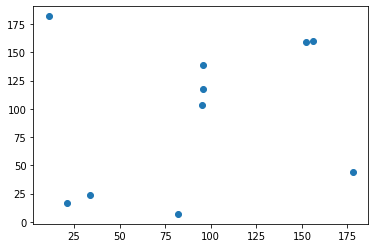

In [ ]:
cityList = []
xPlot = []
yPlot = []

for i in range(0,10):
  x=int(random.random() * 200)
  y=int(random.random() * 200)
  cityList.append(City(x, y))
  xPlot.append(x)
  yPlot.append(y)

print(cityList)
print('x:', xPlot)
print('y:', yPlot)

plt.scatter(xPlot, yPlot)
plt.show()

In [ ]:
geneticAlgorithm(population=cityList, popSize=310, eliteSize=150, mutationRate=0.0002, generations=100)
